**Task 3:** To Explore Decision Tree Algorithm



For the ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load the dataset
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#  more information on our dataset 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#  description of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


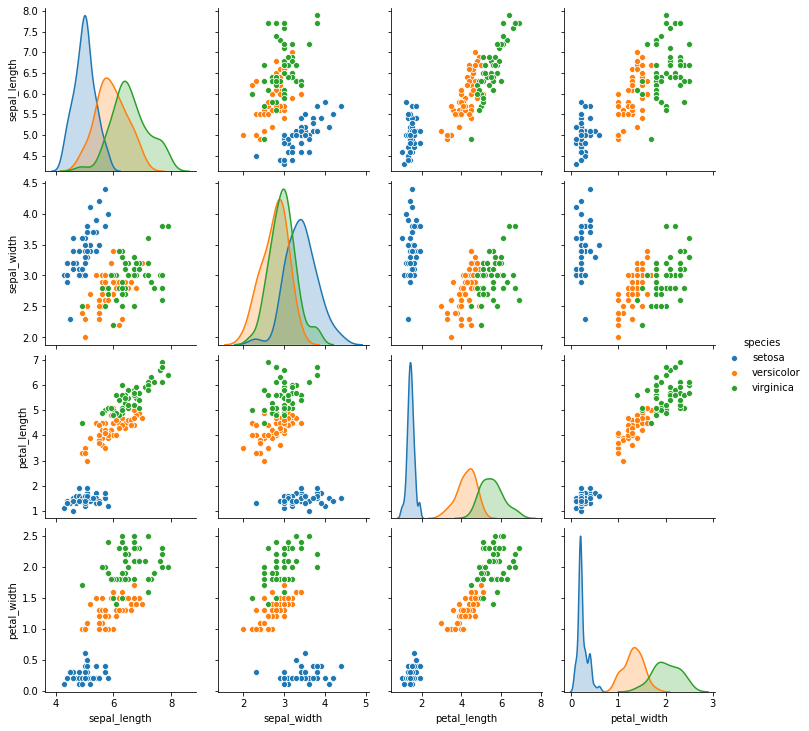

In [ ]:
sns.pairplot(iris, hue='species')

Clearly, the petal length and petal width features have the strongest positive correlation in all three species. And sepal length also is positively correlated to petal length and petal width. However, sepal width has a negative correlation with all other features

Let's take a look at which two features have strongest correlation in the three features individually

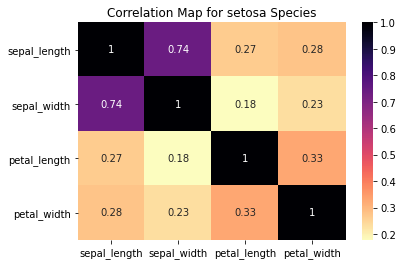

In [ ]:
sns.heatmap(iris[iris['species']=='setosa'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for setosa Species')
plt.show()



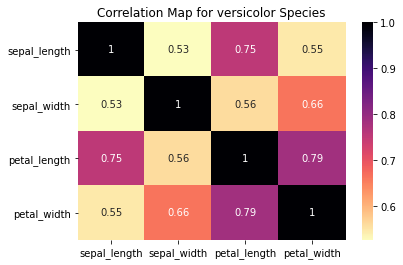

In [ ]:
sns.heatmap(iris[iris['species']=='versicolor'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for versicolor Species')
plt.show()



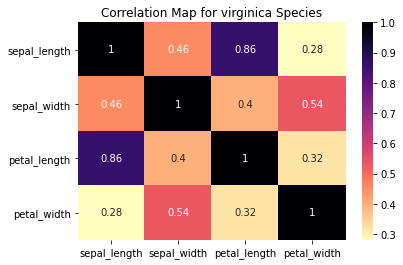

In [ ]:
sns.heatmap(iris[iris['species']=='virginica'].corr(), cmap='magma_r', annot=True)
plt.title('Correlation Map for virginica Species')
plt.show()

 - In setosa species, maximum correlation can be seen between sepal length and sepal width.
 
 - In veriscolor species petal length and petal width have maximum postive corrrelation, followed by petal length and sepal length.
 
 - In virginica species, there is maximum positive correlation between the lengths of petal and sepal.
 
 
 

## Preparing the Data

In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']

In [ ]:
# importing the required function and splitting our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Training the model



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
# fitting our model to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)

## Evaluating the model

In [ ]:
# evaluation metrics for classification model
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('Classification Report of the Model is as follows:\n')
print(classification_report(y_test, predictions))
print()
print('Confusion matrix: \n')
print(confusion_matrix(y_test, predictions))

Classification Report of the Model is as follows:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion matrix: 

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


The model has correctly classified all the data from the test data!

## Visualizing the Decision tree



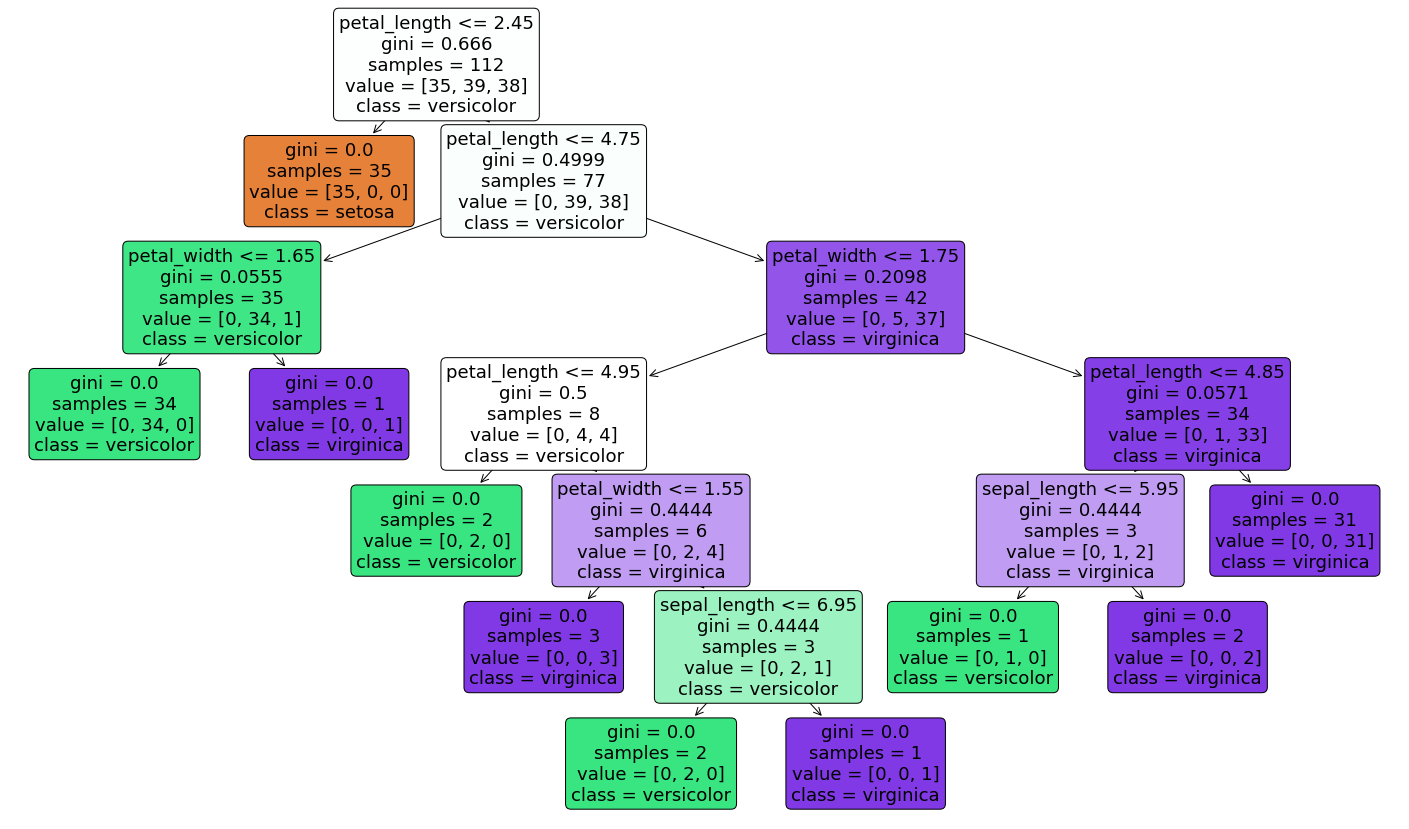

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))

tree_image = plot_tree(dtree,feature_names=iris.columns[:-1],class_names=iris['species'].unique().tolist(),
                       precision=4,label="all",filled=True,rounded=True)
plt.savefig('showTree')

**Thus we can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**